In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
colors = sns.color_palette()

## 데이터 불러오기

#### 데이터 셋 
 - 온라인 리테일 사이트의 2010/12 - 2011/12간의 주문 기록 데이터
 - 약 500,000건의 데이터 
 - 데이터 출처: [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Online+Retail#)

In [2]:
retail = pd.read_excel('C:/Users/Gyu-ri Kim/Desktop/Tangerri/Python/fast-campus-practice/Online Retail.xlsx')

In [3]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 데이터 탐색 

In [4]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


-> description과 customer id의 경우 값이 비는 것을 알 수 있음   
(cusmtomer id의 경우 모두 값을 가지고 있어야 하므로 null값인 행을 삭제하기로 판단)

In [6]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


-> quantity와 unitprice의 경우 음수값이 나오는 것은 이상값이므로 삭제하기로 판단

## 데이터 전처리

#### null데이터 처리

In [7]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
retail = retail[pd.notnull(retail['CustomerID'])]
len(retail)

406829

#### 비즈니스 로직에 맞지 않은 데이터 제거

quantity, unitprice < 0인 데이터 제거

In [9]:
retail = retail[retail['Quantity'] > 0]
retail = retail[retail['UnitPrice'] > 0]

len(retail)

397884

In [10]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [11]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


#### 데이터 타입 변형

* 메모리의 효율화
* 올바른 데이터 타입 매칭

In [12]:
retail['CustomerID'] = retail['CustomerID'].astype(np.int32)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


* 날짜 타입 데이터 변환

In [13]:
retail['InvoiceDate']= pd.to_datetime(retail['InvoiceDate'], infer_datetime_format = True)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


#### 새로운 칼럼 추가

* 고객의 총 지출비용 추가(CheckoutPrice) = Quantity * Unitprice

In [14]:
retail['CheckoutPrice'] = retail['UnitPrice'] * retail['CustomerID']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,45517.5
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,60511.5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,49087.5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,60511.5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,60511.5


#### 정제한 데이터 저장


In [15]:
retail.to_csv('C:/Users/Gyu-ri Kim/Desktop/Tangerri/Python/fast-campus-practice/OnlineRetailClean.csv')

## 데이터 분석

#### 특정기간동안의 매출

* 전체매출

In [16]:
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

18801325843.013

* 국가별 매출

In [20]:
rev_by_countries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values()
rev_by_countries

Country
Saudi Arabia            2.658754e+05
Bahrain                 9.753786e+05
Czech Republic          1.000369e+06
Lithuania               1.524614e+06
Brazil                  1.820859e+06
RSA                     3.087853e+06
Lebanon                 3.094504e+06
United Arab Emirates    3.323400e+06
European Community      4.378298e+06
USA                     5.223338e+06
Iceland                 5.941500e+06
Japan                   8.384581e+06
Greece                  8.924132e+06
Malta                   9.269137e+06
Unspecified             1.070558e+07
Israel                  1.145620e+07
Denmark                 1.495721e+07
Canada                  1.584374e+07
Poland                  1.757448e+07
Austria                 2.118053e+07
Sweden                  2.347131e+07
Cyprus                  4.349103e+07
Italy                   4.499997e+07
Australia               4.502593e+07
Finland                 4.547779e+07
Channel Islands         5.042150e+07
Norway                  7.0317

[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'Lithuania'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'RSA'),
 Text(6, 0, 'Lebanon'),
 Text(7, 0, 'United Arab Emirates'),
 Text(8, 0, 'European Community'),
 Text(9, 0, 'USA'),
 Text(10, 0, 'Iceland'),
 Text(11, 0, 'Japan'),
 Text(12, 0, 'Greece'),
 Text(13, 0, 'Malta'),
 Text(14, 0, 'Unspecified'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Denmark'),
 Text(17, 0, 'Canada'),
 Text(18, 0, 'Poland'),
 Text(19, 0, 'Austria'),
 Text(20, 0, 'Sweden'),
 Text(21, 0, 'Cyprus'),
 Text(22, 0, 'Italy'),
 Text(23, 0, 'Australia'),
 Text(24, 0, 'Finland'),
 Text(25, 0, 'Channel Islands'),
 Text(26, 0, 'Norway'),
 Text(27, 0, 'Switzerland'),
 Text(28, 0, 'Netherlands'),
 Text(29, 0, 'Belgium'),
 Text(30, 0, 'Portugal'),
 Text(31, 0, 'Spain'),
 Text(32, 0, 'Singapore'),
 Text(33, 0, 'Germany'),
 Text(34, 0, 'France'),
 Text(35, 0, 'EIRE'),
 Text(36, 0, 'United Kingdom')]

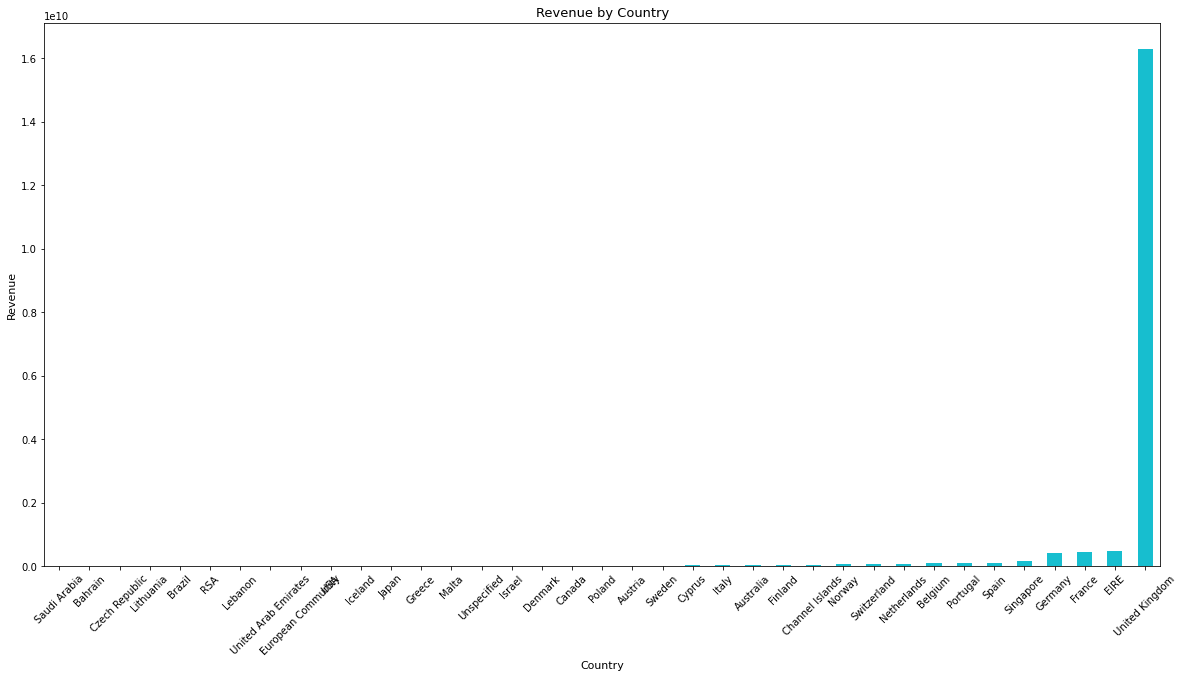

In [27]:
plot = rev_by_countries.plot(kind = 'bar', color = colors[-1], figsize= (20, 10))
plot.set_xlabel('Country', fontsize = 11)
plot.set_ylabel('Revenue', fontsize = 11)
plot.set_title('Revenue by Country', fontsize = 13)
plot.set_xticklabels(labels = rev_by_countries.index , rotation = 45)

In [28]:
rev_by_countries / total_revenue

Country
Saudi Arabia            0.000014
Bahrain                 0.000052
Czech Republic          0.000053
Lithuania               0.000081
Brazil                  0.000097
RSA                     0.000164
Lebanon                 0.000165
United Arab Emirates    0.000177
European Community      0.000233
USA                     0.000278
Iceland                 0.000316
Japan                   0.000446
Greece                  0.000475
Malta                   0.000493
Unspecified             0.000569
Israel                  0.000609
Denmark                 0.000796
Canada                  0.000843
Poland                  0.000935
Austria                 0.001127
Sweden                  0.001248
Cyprus                  0.002313
Italy                   0.002393
Australia               0.002395
Finland                 0.002419
Channel Islands         0.002682
Norway                  0.003740
Switzerland             0.004315
Netherlands             0.004760
Belgium                 0.004873
Po

-> 국가별 매출 비율을 구한 결과 영국이 86%차지하는 것을 알 수 있음

#### *그래프 그리는 과정을 함수로 정의

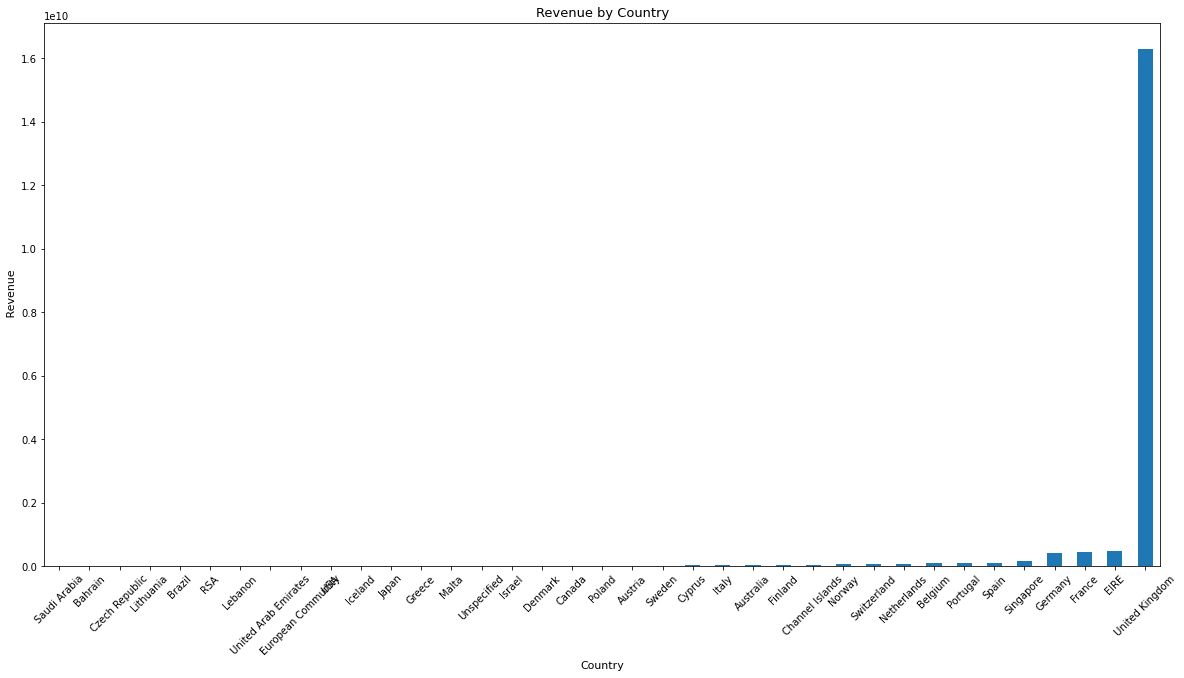

In [32]:
def plot_bar(df, xlabel, ylabel, title, color=colors[0], figsize=(20,10), rotation=45):
    plot = df.plot(kind = 'bar', color = color, figsize= figsize)
    plot.set_xlabel(xlabel, fontsize = 11)
    plot.set_ylabel(ylabel, fontsize = 11)
    plot.set_title(title, fontsize = 13)
    plot.set_xticklabels(labels = df.index , rotation = rotation)
    
plot_bar(rev_by_countries, 'Country', ' Revenue', 'Revenue by Country')